In [1]:
import re
import requests
import pandas as pd
import numpy as np
import os
import glob
from prettytable import PrettyTable
from bs4 import BeautifulSoup
pd.options.display.max_columns = None
from numpy import loadtxt
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#scraping the base url form the website www.football-data.co.uk
url="https://www.football-data.co.uk/englandm.php"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [3]:
data = []

''' removing unwanted season as the dataset attribute format does not match the format of the newer data
unwanted = ['Season 1993/1994','Season 1994/1995','Season 1995/1996','Season 1996/1997','Season 1997/1998',
'Season 1998/1999','Season 1999/2000','Season 2000/2001','Season 2001/2002'] '''

for link in soup.find_all('a', href=True, text=re.compile('Premier League')):
    data.append("https://www.football-data.co.uk/"+link.get("href"))

data = data[1:20]
print(data)

['https://www.football-data.co.uk/mmz4281/2122/E0.csv', 'https://www.football-data.co.uk/mmz4281/2021/E0.csv', 'https://www.football-data.co.uk/mmz4281/1920/E0.csv', 'https://www.football-data.co.uk/mmz4281/1819/E0.csv', 'https://www.football-data.co.uk/mmz4281/1718/E0.csv', 'https://www.football-data.co.uk/mmz4281/1617/E0.csv', 'https://www.football-data.co.uk/mmz4281/1516/E0.csv', 'https://www.football-data.co.uk/mmz4281/1415/E0.csv', 'https://www.football-data.co.uk/mmz4281/1314/E0.csv', 'https://www.football-data.co.uk/mmz4281/1213/E0.csv', 'https://www.football-data.co.uk/mmz4281/1112/E0.csv', 'https://www.football-data.co.uk/mmz4281/1011/E0.csv', 'https://www.football-data.co.uk/mmz4281/0910/E0.csv', 'https://www.football-data.co.uk/mmz4281/0809/E0.csv', 'https://www.football-data.co.uk/mmz4281/0708/E0.csv', 'https://www.football-data.co.uk/mmz4281/0607/E0.csv', 'https://www.football-data.co.uk/mmz4281/0506/E0.csv', 'https://www.football-data.co.uk/mmz4281/0405/E0.csv', 'https://

In [4]:
frames = []

for i in range(len(data)):
    globals()[f"df{i}"] = pd.read_csv(data[i], encoding="latin-1", on_bad_lines='skip')
    df_object = globals()[f"df{i}"]
    frames.append(df_object)

In [5]:
df = pd.DataFrame()
for d in frames:
    df =  df.append(d, ignore_index=True)

/var/folders/c_/5jdtxfj11gd8pst6qqcmv0wr0000gn/T/ipykernel_3919/3481884797.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =  df.append(d, ignore_index=True)


In [6]:


df_new = df.iloc[:,:23]
df_new = df_new.drop(['Div','Date','Time'],axis=1)

table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)

In [7]:
df_new.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,Brentford,Arsenal,2.0,0.0,H,1.0,0.0,H,M Oliver,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0
1,Man United,Leeds,5.0,1.0,H,1.0,0.0,H,P Tierney,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0
2,Burnley,Brighton,1.0,2.0,A,1.0,0.0,H,D Coote,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0
3,Chelsea,Crystal Palace,3.0,0.0,H,2.0,0.0,H,J Moss,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0
4,Everton,Southampton,3.0,1.0,H,0.0,1.0,A,A Madley,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0


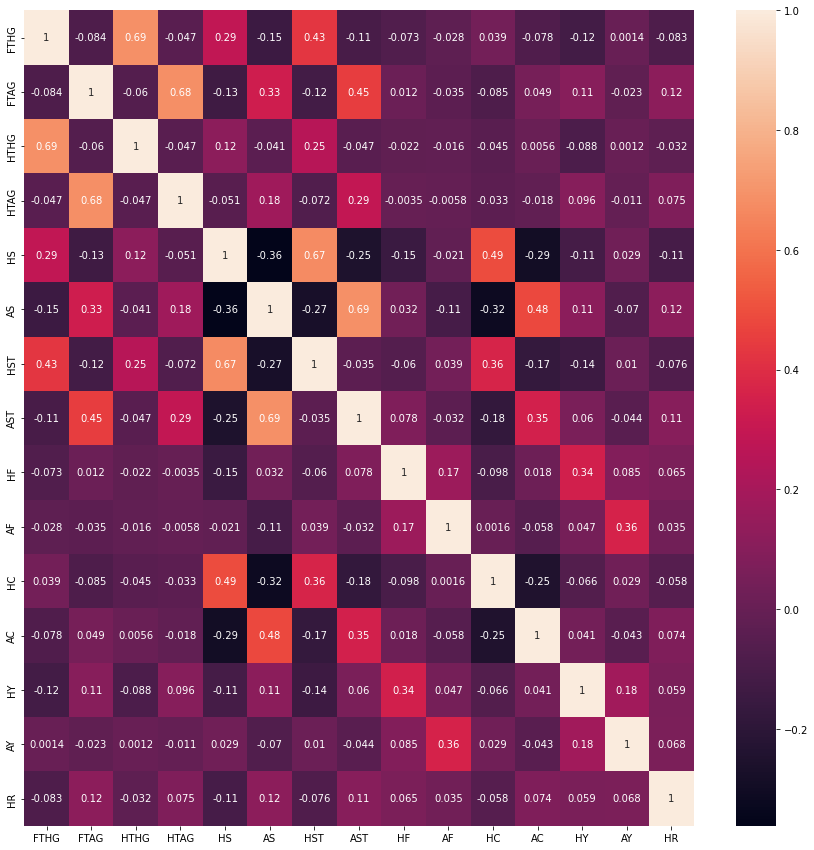

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(), annot=True)
plt.show()

/var/folders/c_/5jdtxfj11gd8pst6qqcmv0wr0000gn/T/ipykernel_3919/635770653.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group=df_new.groupby('HomeTeam')['FTHG','FTAG','HTHG'].sum()


<Figure size 1080x1080 with 0 Axes>

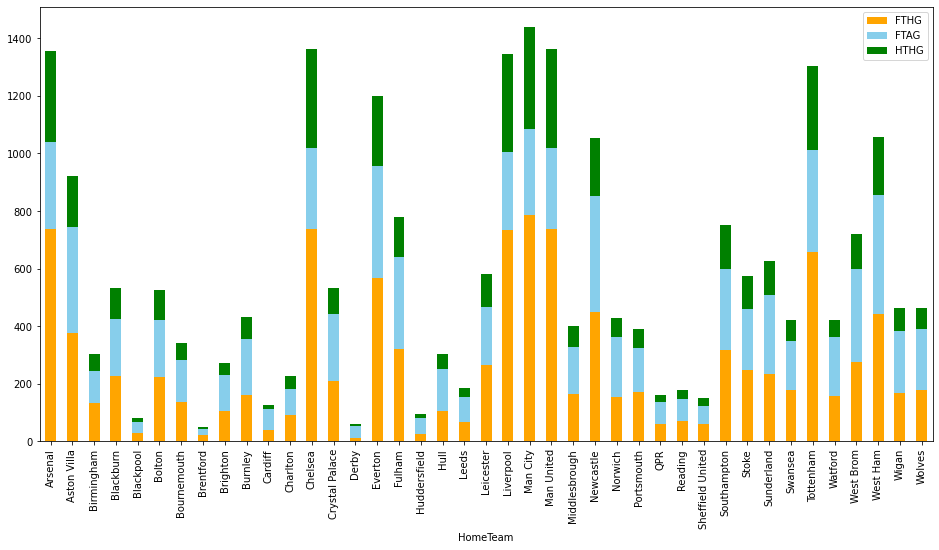

In [9]:
df_group=df_new.groupby('HomeTeam')['FTHG','FTAG','HTHG'].sum()
plt.figure(figsize=(15,15))
df_group.plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'green'],figsize=(16,8));

/var/folders/c_/5jdtxfj11gd8pst6qqcmv0wr0000gn/T/ipykernel_3919/2374459733.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group=df_new.groupby('AwayTeam')['FTHG','FTAG','HTHG'].sum()


<Figure size 1080x1080 with 0 Axes>

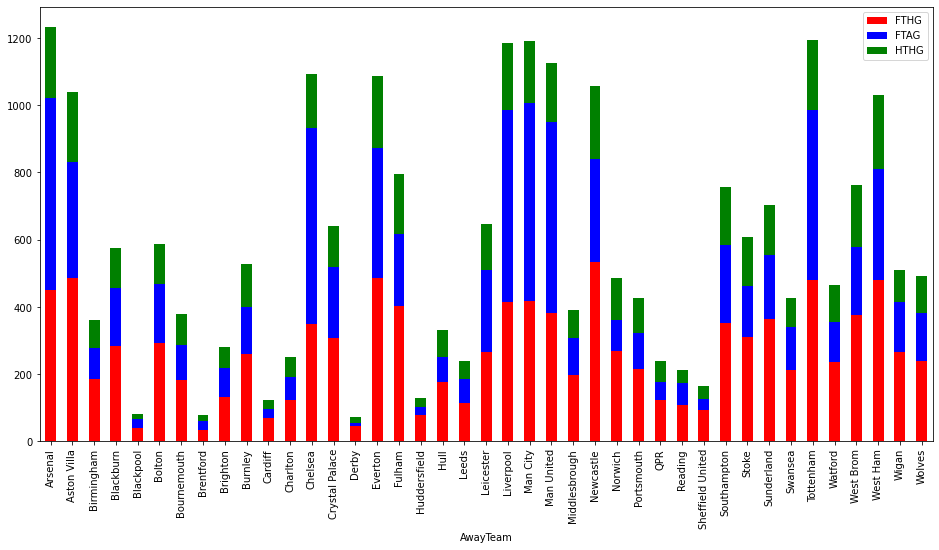

In [10]:
df_group=df_new.groupby('AwayTeam')['FTHG','FTAG','HTHG'].sum()
plt.figure(figsize=(15,15))
df_group.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'],figsize=(16,8));
plt.savefig('save_as_a_png2.png')

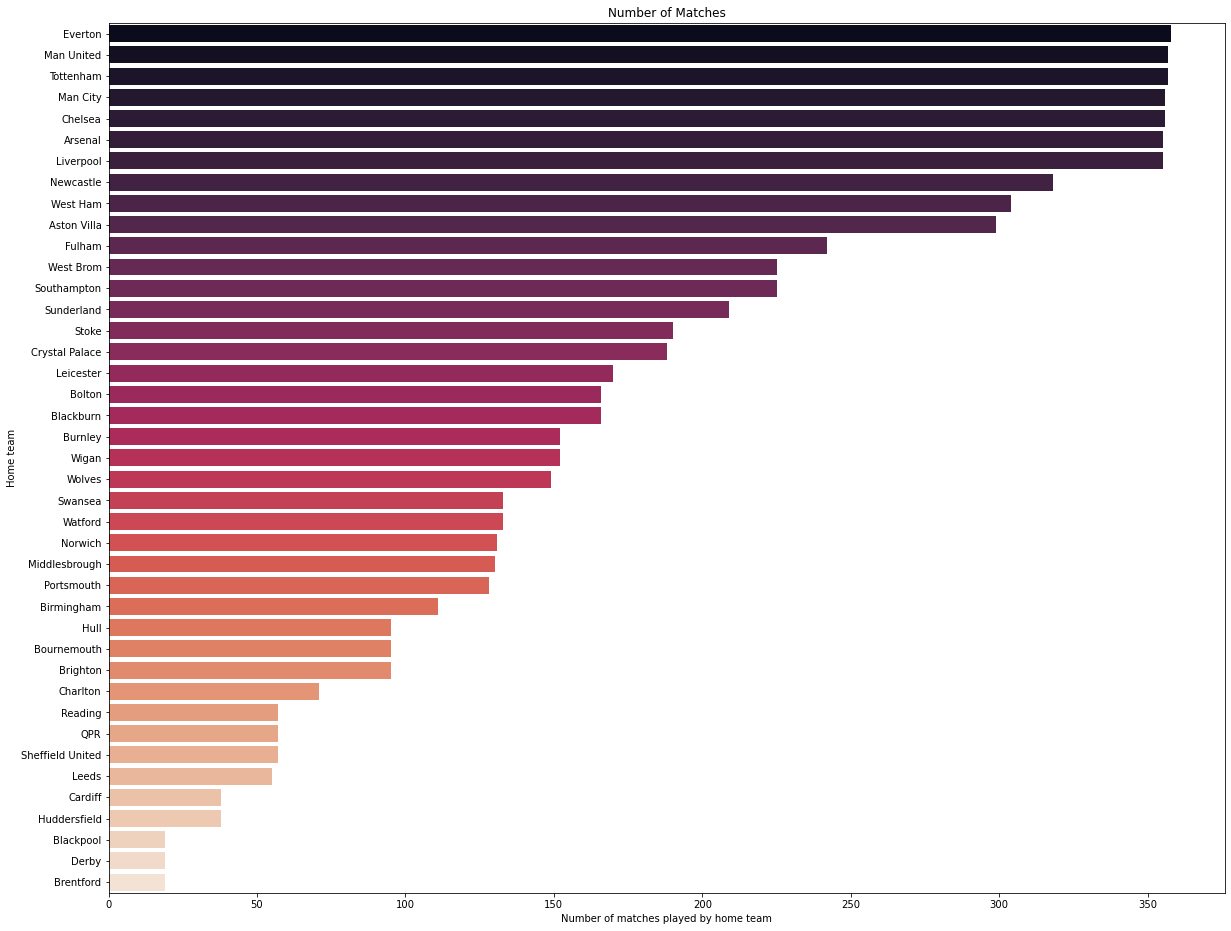

In [11]:
yearly_count = df_new['HomeTeam'].value_counts().index
plt.figure(figsize=(20,16))
ax=sns.countplot(data=df,y='HomeTeam',order=yearly_count, palette="rocket")
ax.set(xlabel='Number of matches played by home team', ylabel='Home team', title='Number of Matches');
plt.savefig('save_as_a_png2.png')

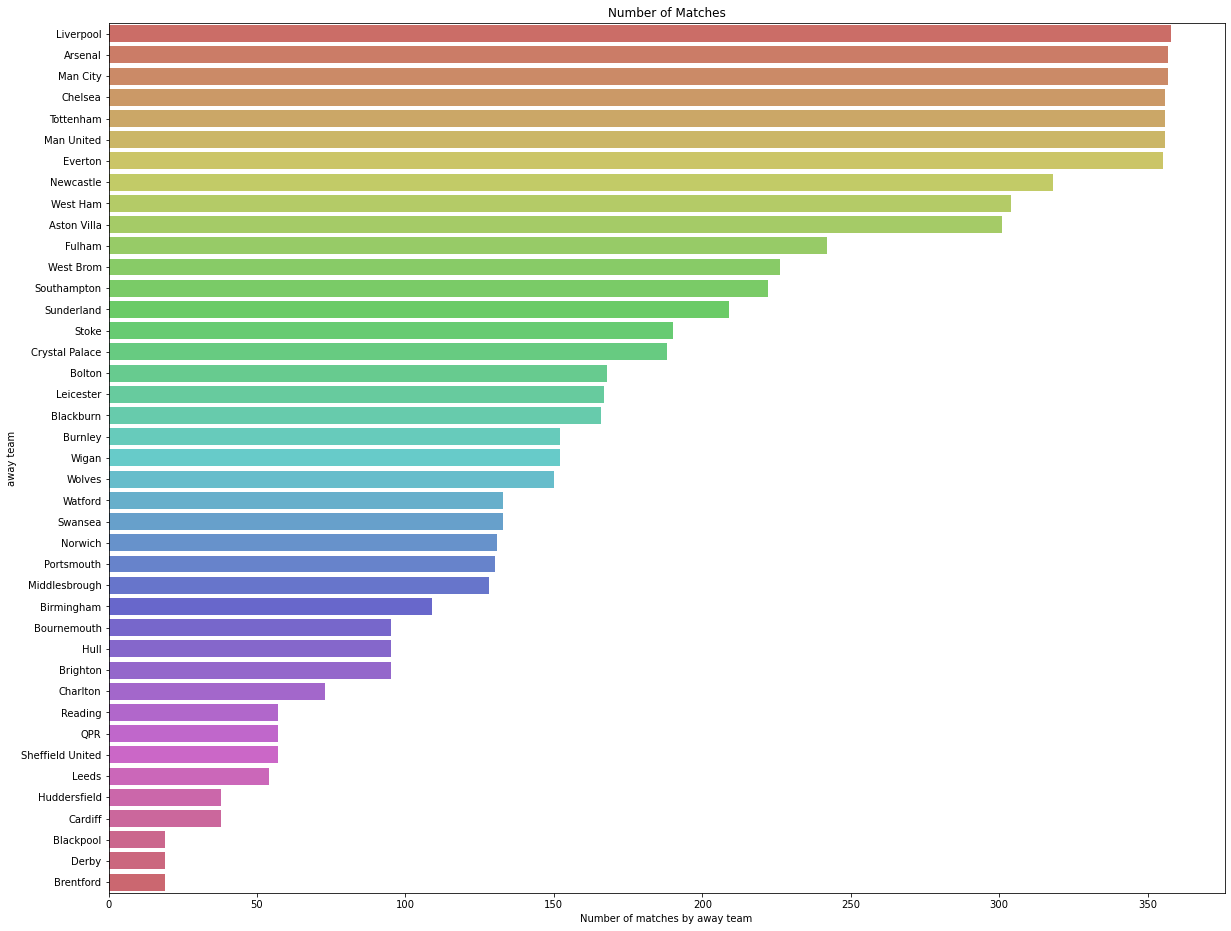

In [12]:

yearly_count = df_new['AwayTeam'].value_counts().index
plt.figure(figsize=(20,16))
ax=sns.countplot(data=df,y='AwayTeam',order=yearly_count, palette="hls")
ax.set(xlabel='Number of matches by away team', ylabel='away team', title='Number of Matches');

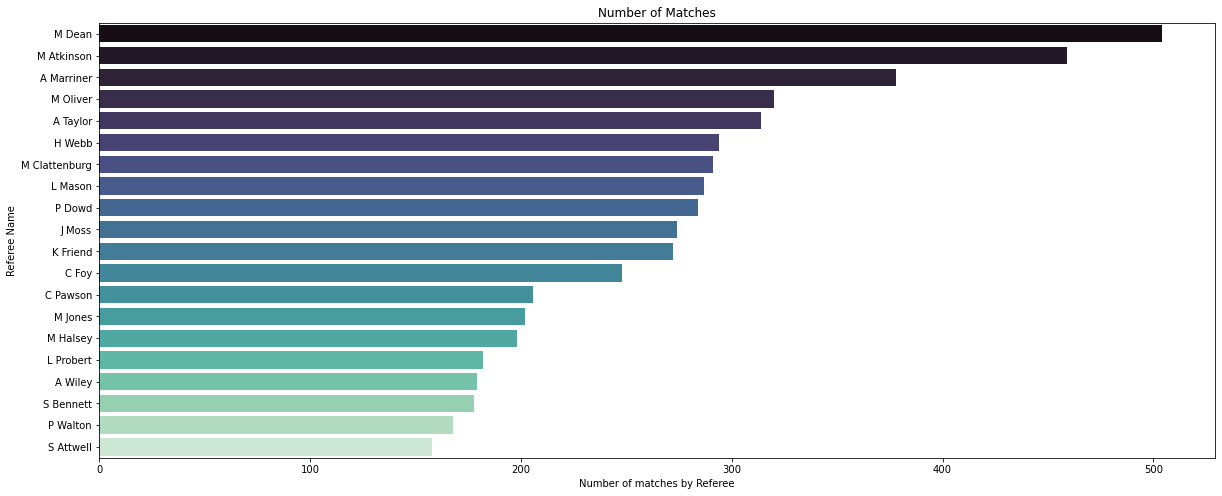

In [13]:
yearly_count = df_new['Referee'].value_counts().head(20).index
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df,y='Referee',order=yearly_count, palette="mako")
ax.set(xlabel='Number of matches by Referee', ylabel='Referee Name', title='Number of Matches');

/var/folders/c_/5jdtxfj11gd8pst6qqcmv0wr0000gn/T/ipykernel_3919/2803520759.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group=df_new.groupby('AwayTeam')['HS','AS','HST' ,'AST' ,'HF'].sum()


<Figure size 1080x1080 with 0 Axes>

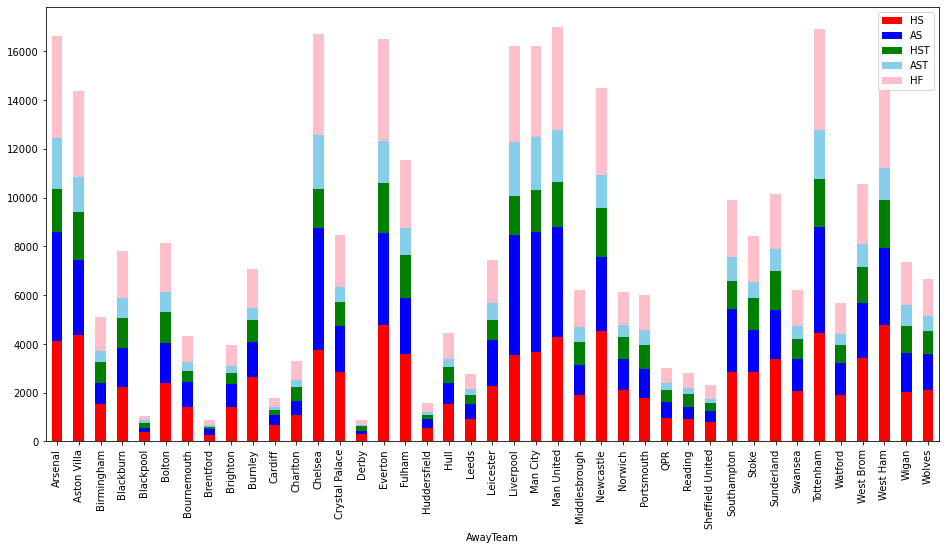

In [14]:
df_group=df_new.groupby('AwayTeam')['HS','AS','HST' ,'AST' ,'HF'].sum()
plt.figure(figsize=(15,15))
df_group.plot(kind='bar', stacked=True, color=['red', 'blue', 'green','skyblue','pink'],figsize=(16,8));

/var/folders/c_/5jdtxfj11gd8pst6qqcmv0wr0000gn/T/ipykernel_3919/2377122224.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group=df_new.groupby('HomeTeam')['HS','AS','HST' ,'AST' ,'HF'].sum()


<Figure size 1080x1080 with 0 Axes>

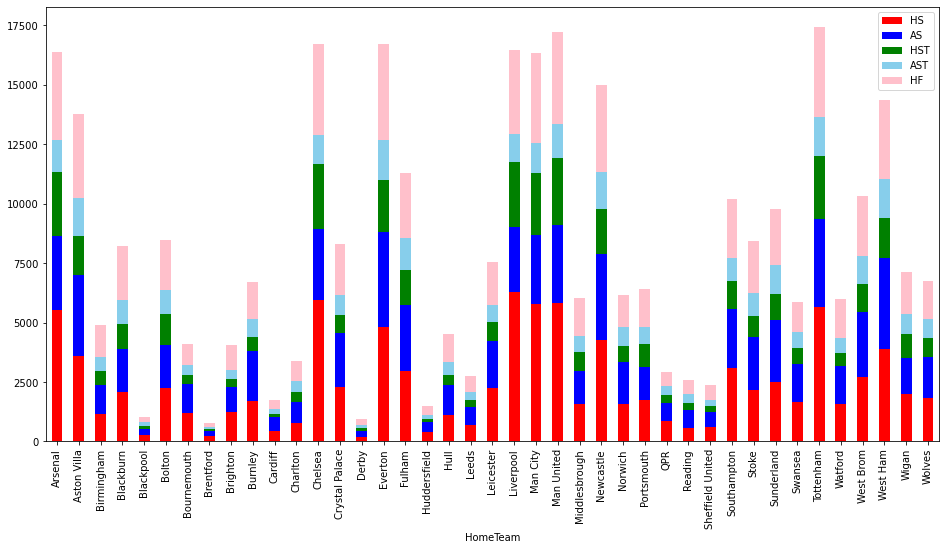

In [15]:
df_group=df_new.groupby('HomeTeam')['HS','AS','HST' ,'AST' ,'HF'].sum()
plt.figure(figsize=(15,15))
df_group.plot(kind='bar', stacked=True, color=['red', 'blue', 'green','skyblue','pink'],figsize=(16,8));

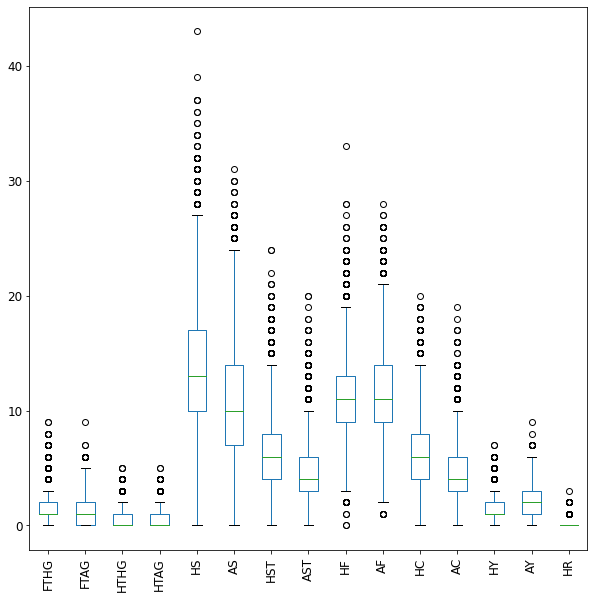

In [16]:
boxplot = df_new.boxplot(figsize = (10,10), rot = 90, fontsize= '12', grid = False)